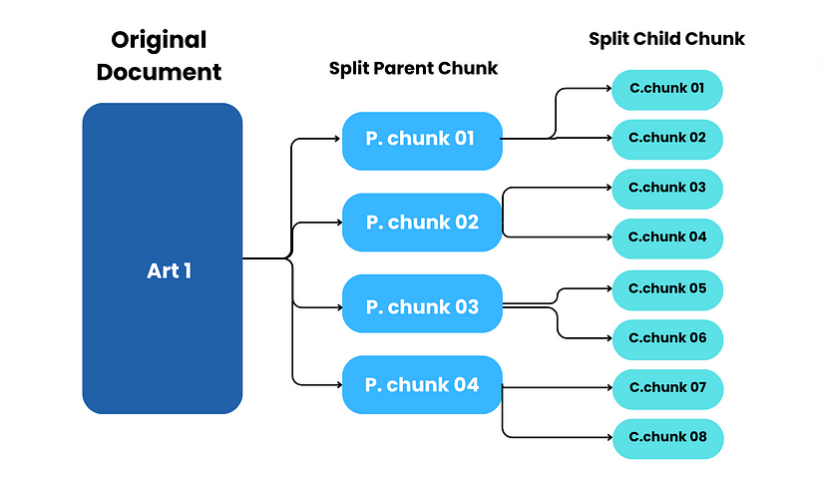


Parent Document Retriever
which issue this parent-child retrieval will solve.

You may want to have small documents, so that their embeddings can most accurately reflect their meaning. If too long, then the embeddings can lose meaning.

You want to have long enough documents that the context of each chunk is retained.

The ParentDocumentRetriever strikes that balance by splitting and storing small chunks of data. During retrieval, it first fetches the small chunks but then looks up the parent ids for those chunks and returns those larger documents.

Note that "parent document" refers to the document that a small chunk originated from. This can either be the whole raw document OR a larger chunk.

In [1]:
from langchain.document_loaders import PyPDFLoader
import os 
import chromadb 
from langchain.vectorstores import Chroma 
from langchain.document_transformers import LongContextReorder 
from langchain.prompts import PromptTemplate
from langchain.embeddings import HuggingFaceBgeEmbeddings 
from langchain.retrievers.merger_retriever import MergerRetriever 
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import  RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import CharacterTextSplitter
from langchain_google_genai import GoogleGenerativeAI,ChatGoogleGenerativeAI,GoogleGenerativeAIEmbeddings

c:\Users\Administrator\miniconda3\envs\idk\Lib\importlib\__init__.py:126: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  return _bootstrap._gcd_import(name[level:], package, level)
c:\Users\Administrator\miniconda3\envs\idk\Lib\site-packages\pydantic\_internal\_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'populate_by_name'
  warnings.warn(message, UserWarning)


In [2]:
loader_un_sdg = PyPDFLoader("data/UN SDG.pdf")
documents_un_sdg = loader_un_sdg.load()
text_splitter_un_sdg = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
text_un_sdg = text_splitter_un_sdg.split_documents(documents_un_sdg)

In [10]:
docs = documents_un_sdg

In [11]:
docs

[Document(metadata={'source': 'data/UN SDG.pdf', 'page': 0}, page_content='TRANSFORMING OUR WORLD:\nTHE 2030 AGENDA FOR \nSUST AINABLE DEVELOPMENT\nUNITED NA TIONS'),
 Document(metadata={'source': 'data/UN SDG.pdf', 'page': 1}, page_content='UNITED NA TIONS\nTRANSFORMING OUR WORLD:\nTHE 2030 AGENDA FOR \nSUST AINABLE DEVELOPMENT\nsustainabledevelopment.un.org\nA/RES/70/1'),
 Document(metadata={'source': 'data/UN SDG.pdf', 'page': 2}, page_content='Transforming+our+world:+the+2030+Agenda+for+Sustainable+Development+.................................................................................+3+Preamble+.................................................................................................................................................................................+3+People+......................................................................................................................................................................................+3+Planet+........

In [3]:

model_name = "BAAI/bge-large-en"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}

hf = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [5]:
!pip install langchain_chroma

In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

In [6]:
from langchain.storage import InMemoryByteStore,InMemoryStore
from langchain_chroma import Chroma

Dataset size: Larger datasets generally benefit from more powerful models like MPNet.

Computational resources: If you have limited resources, BGE Small En or MiniLM might be better options.

Task complexity: For complex tasks like question answering or text summarization, MPNet is often preferred.

Embedding dimensionality: Different models produce embeddings of varying dimensions.Choose based on downstream task requirements.

Performance vs. efficiency trade-off: Decide if you prioritize high accuracy or faster processing

Experimentation is key. Try different models and evaluate their performance on your specific task and dataset to find the best fit.
MTEB: Massive Text Embedding Benchmark

MPNET: Masked and Permuted Pre-training for Language Understanding.

BGE(BAAI general embedding) BAAI: https://huggingface.co/BAAI

https://huggingface.co/sentence-transformers

https://huggingface.co/spaces/mteb/leaderboard

https://huggingface.co/blog/mteb

The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

In [7]:
GOOGLE_API_KEY = ""
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
vectorstore = Chroma( collection_name= "fulldocs",embedding_function=hf)

In [8]:
store = InMemoryStore()


In [ ]:
from langchain.retrievers import ParentDocumentRetriever 

retriever = ParentDocumentRetriever(
    vectorstore= vectorstore, docstore = store,child_splitter= child_splitter
)

In [ ]:
retriever.add_documents(docs,ids=None)

In [ ]:
list(store.yield_keys())

In [ ]:
retrieved_docs = retriever.invoke("Explain me about the documents")

In [ ]:
print(retrieved_docs[0].page_content)

In [ ]:
child_splitter = RecursiveCharacterTextSplitter(chunk_size=500)

In [ ]:
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)

In [ ]:
store1 = InMemoryStore()

vectorstore1 = Chroma(collection_name="full_document",embedding_function=hf)



In [ ]:
retriever2 = ParentDocumentRetriever(
    vectorstore=vectorstore1, docstore = store1, child_splitter=child_splitter, parent_splitter=parent_splitter
)

In [ ]:
retriever2.add_documents(docs)

In [ ]:
retrieved_docs2= retriever2.invoke("What did the president say about Ketanji Brown Jackson")
     

In [ ]:
#Data Generation

from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

result = llm.invoke("Write a ballad about LangChain")
print(result.content)

In [ ]:
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI

qa = RetrievalQA.from_chain_type(llm=llm,
                                 chain_type="stuff",
                                 retriever=retriever2)

query = "What did the president say about Ketanji Brown Jackson"
     

qa.run(query)